In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

from inference import *

In [2]:
encoder = Encoder().to(device)
importance = Importance().to(device)
decoder = Decoder().to(device)
probabilityModel = ProbabilityModel().to(device)
vgg16 = VGG16().to(device)

# load weights
arch = torch.load('/mnt/HDD3/weights_all/b6')
encoder.load_state_dict(arch['encoder'])
importance.load_state_dict(arch['importance'])
decoder.load_state_dict(arch['decoder'])
probabilityModel.load_state_dict(arch['probabilityModel'])

# kmeans on decoder bias
dec_bias = []
dec_bias.append(list(decoder.conv1[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv2[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv3.bias.detach().cpu().numpy()))

dec_bias_raw, d1, d2, d3 = arch['dec_bias_raw'], arch['d1'], arch['d2'], arch['d3']
# kmeans = KMeans(n_clusters=256, random_state=0).fit(dec_bias_raw)
# dec_bias_center = torch.nn.Parameter(torch.tensor(kmeans.cluster_centers_))

kmeans = KMeans(n_clusters=255, random_state=0).fit(dec_bias_raw)
dec_bias.extend(kmeans.cluster_centers_.tolist())
dec_bias = np.array(dec_bias)

# quantizer
round_straightthrough = RoundStraightThrough().apply

# losses
L1_loss = nn.L1Loss(reduction='sum')
MSE_loss = nn.MSELoss(reduction='sum')

jpeg_ai = JPEG_AI('jpeg_ai', mode='test', n_way=1, k_shot=1, k_query=1, batchsz=50, resize=256)

shuffle DB :test, b:50, 1-way, 1-shot, 1-query, resize:256


In [3]:
b = 6

/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:2539: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


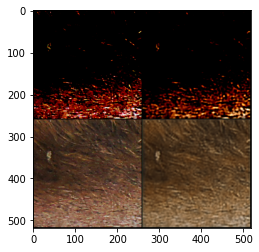

MS-SSIM loss: 0.107 | MSE: 7529.614 | perceptual loss: 1866236.875 | bpp: 4.195 |  PSNR: 27.081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


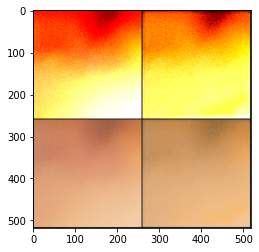

MS-SSIM loss: 0.222 | MSE: 6673.710 | perceptual loss: 1049430.625 | bpp: 0.742 |  PSNR: 27.637


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


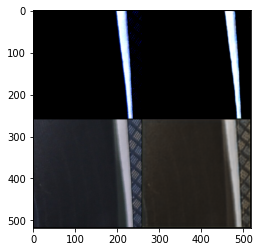

MS-SSIM loss: 0.064 | MSE: 5156.030 | perceptual loss: 815083.625 | bpp: 4.623 |  PSNR: 28.726


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


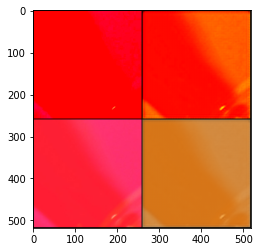

MS-SSIM loss: 0.424 | MSE: 206605.375 | perceptual loss: 1358739.000 | bpp: 1.467 |  PSNR: 12.741


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


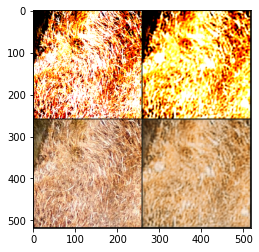

MS-SSIM loss: 0.157 | MSE: 38379.242 | perceptual loss: 2885034.250 | bpp: 0.427 |  PSNR: 20.021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


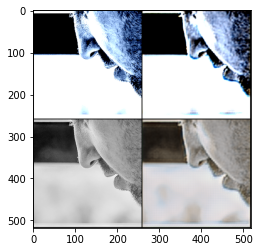

MS-SSIM loss: 0.129 | MSE: 8828.536 | perceptual loss: 1476438.625 | bpp: 0.514 |  PSNR: 26.392


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


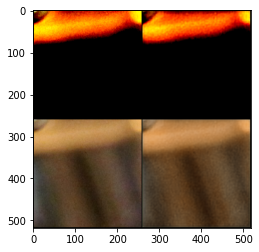

MS-SSIM loss: 0.068 | MSE: 2730.043 | perceptual loss: 873985.250 | bpp: 0.578 |  PSNR: 31.465


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


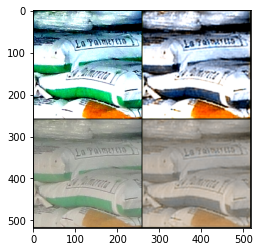

MS-SSIM loss: 0.082 | MSE: 6059.100 | perceptual loss: 1312717.000 | bpp: 1.062 |  PSNR: 28.028


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


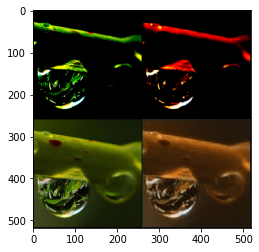

MS-SSIM loss: 0.167 | MSE: 27075.725 | perceptual loss: 1539137.125 | bpp: 1.947 |  PSNR: 21.518


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


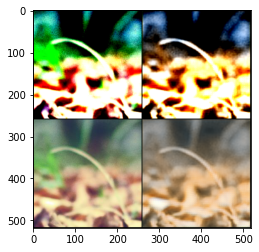

MS-SSIM loss: 0.121 | MSE: 14362.827 | perceptual loss: 1442595.750 | bpp: 0.242 |  PSNR: 24.293


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


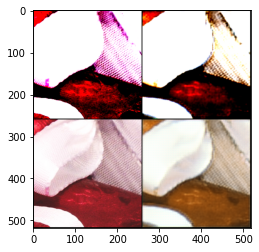

MS-SSIM loss: 0.252 | MSE: 29252.488 | perceptual loss: 2083791.625 | bpp: 0.445 |  PSNR: 21.224


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


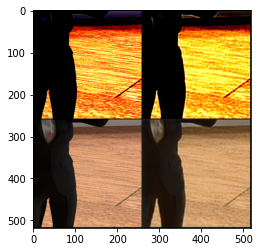

MS-SSIM loss: 0.139 | MSE: 10748.339 | perceptual loss: 1754403.750 | bpp: 0.764 |  PSNR: 25.529


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


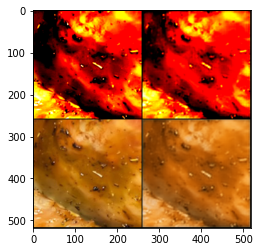

MS-SSIM loss: 0.098 | MSE: 7532.953 | perceptual loss: 1454629.250 | bpp: 1.659 |  PSNR: 27.046


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


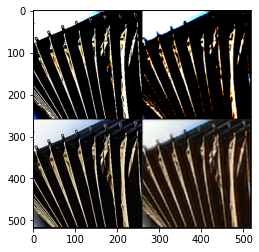

MS-SSIM loss: 0.126 | MSE: 86645.164 | perceptual loss: 3365377.000 | bpp: 0.113 |  PSNR: 16.470


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


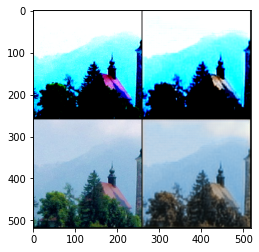

MS-SSIM loss: 0.160 | MSE: 8938.123 | perceptual loss: 1602833.625 | bpp: 0.390 |  PSNR: 26.321


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


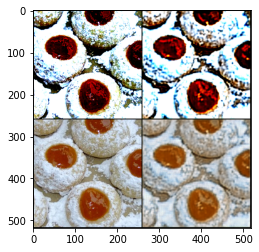

MS-SSIM loss: 0.100 | MSE: 16611.008 | perceptual loss: 2431800.250 | bpp: 0.511 |  PSNR: 23.647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


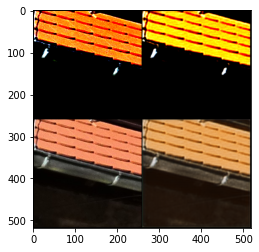

MS-SSIM loss: 0.076 | MSE: 14504.990 | perceptual loss: 1454765.000 | bpp: 3.679 |  PSNR: 24.230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


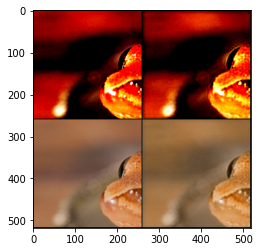

MS-SSIM loss: 0.081 | MSE: 3475.698 | perceptual loss: 827976.750 | bpp: 0.634 |  PSNR: 30.458


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


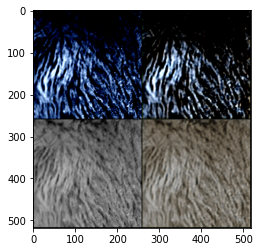

MS-SSIM loss: 0.103 | MSE: 6571.239 | perceptual loss: 1230579.375 | bpp: 1.980 |  PSNR: 27.685


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


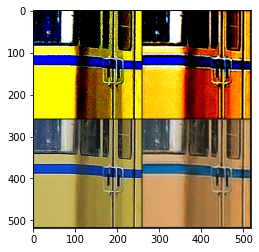

MS-SSIM loss: 0.188 | MSE: 35969.473 | perceptual loss: 2147381.500 | bpp: 1.285 |  PSNR: 20.296


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


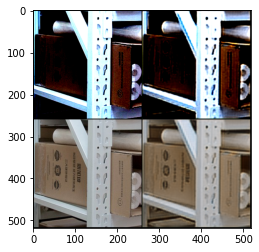

MS-SSIM loss: 0.079 | MSE: 8980.742 | perceptual loss: 1724613.750 | bpp: 0.169 |  PSNR: 26.320


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


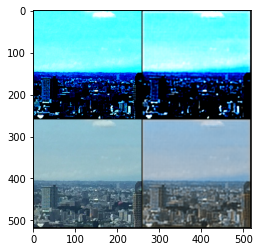

MS-SSIM loss: 0.096 | MSE: 10134.758 | perceptual loss: 1337621.500 | bpp: 1.060 |  PSNR: 25.786


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


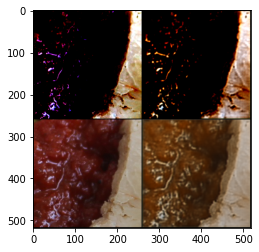

MS-SSIM loss: 0.079 | MSE: 12392.473 | perceptual loss: 1499354.500 | bpp: 2.745 |  PSNR: 24.957


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


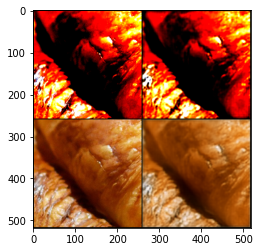

MS-SSIM loss: 0.122 | MSE: 9698.403 | perceptual loss: 1600158.625 | bpp: 0.564 |  PSNR: 25.983


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


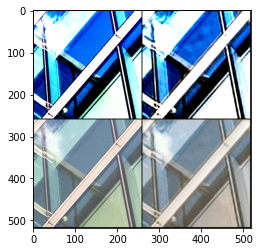

MS-SSIM loss: 0.146 | MSE: 21308.869 | perceptual loss: 2025484.500 | bpp: 0.346 |  PSNR: 22.567


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


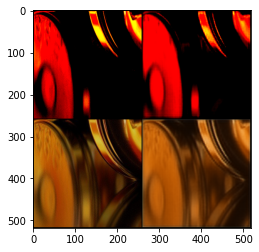

MS-SSIM loss: 0.149 | MSE: 12405.220 | perceptual loss: 1580716.875 | bpp: 2.206 |  PSNR: 24.880


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


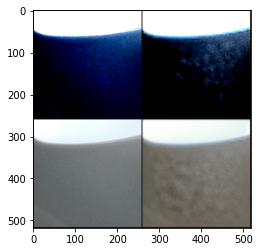

MS-SSIM loss: 0.391 | MSE: 6996.249 | perceptual loss: 1113487.375 | bpp: 0.183 |  PSNR: 27.412


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


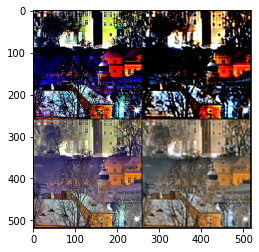

MS-SSIM loss: 0.444 | MSE: 77715.711 | perceptual loss: 3734989.750 | bpp: 0.114 |  PSNR: 16.951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


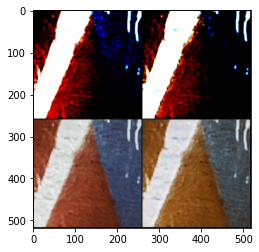

MS-SSIM loss: 0.142 | MSE: 12364.907 | perceptual loss: 1795838.125 | bpp: 0.231 |  PSNR: 24.954


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


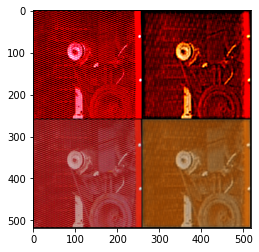

MS-SSIM loss: 0.369 | MSE: 66250.359 | perceptual loss: 2995838.250 | bpp: 1.270 |  PSNR: 17.669


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


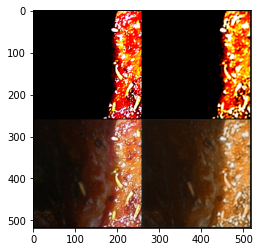

MS-SSIM loss: 0.113 | MSE: 17762.492 | perceptual loss: 1737038.500 | bpp: 0.425 |  PSNR: 23.366


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


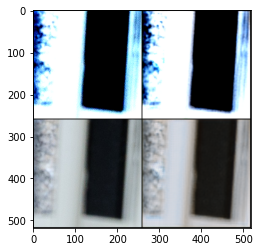

MS-SSIM loss: 0.084 | MSE: 3624.124 | perceptual loss: 1106599.375 | bpp: 0.295 |  PSNR: 30.254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


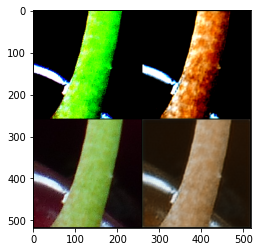

MS-SSIM loss: 0.217 | MSE: 29731.617 | perceptual loss: 1375492.125 | bpp: 0.088 |  PSNR: 21.139


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


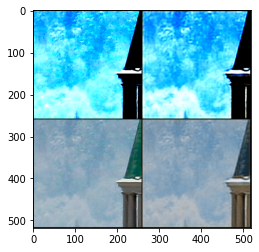

MS-SSIM loss: 0.099 | MSE: 5137.562 | perceptual loss: 1109873.125 | bpp: 0.316 |  PSNR: 28.741


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


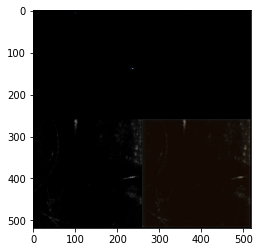

MS-SSIM loss: 0.064 | MSE: 11311.783 | perceptual loss: 991099.438 | bpp: 5.840 |  PSNR: 25.258


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


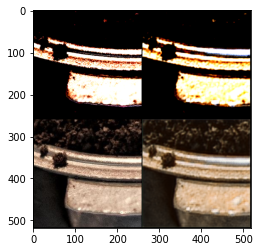

MS-SSIM loss: 0.094 | MSE: 13149.334 | perceptual loss: 1899177.750 | bpp: 0.219 |  PSNR: 24.654


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


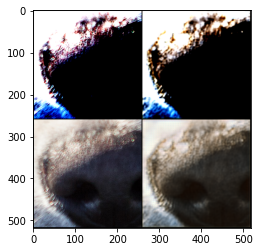

MS-SSIM loss: 0.098 | MSE: 8262.866 | perceptual loss: 1693907.250 | bpp: 0.200 |  PSNR: 26.680


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


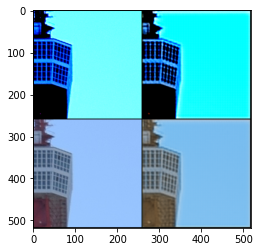

MS-SSIM loss: 0.384 | MSE: 17815.387 | perceptual loss: 895741.812 | bpp: 12.344 |  PSNR: 23.304


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


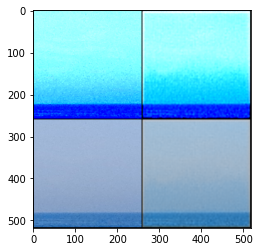

MS-SSIM loss: 0.133 | MSE: 4311.007 | perceptual loss: 741594.250 | bpp: 2.949 |  PSNR: 29.486


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


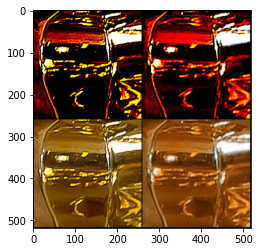

MS-SSIM loss: 0.464 | MSE: 38395.352 | perceptual loss: 2590673.000 | bpp: 0.172 |  PSNR: 19.994


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


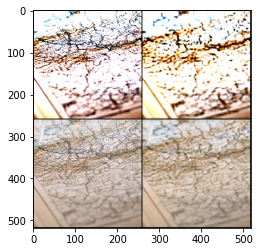

MS-SSIM loss: 0.096 | MSE: 24304.305 | perceptual loss: 2052605.750 | bpp: 0.323 |  PSNR: 21.996


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


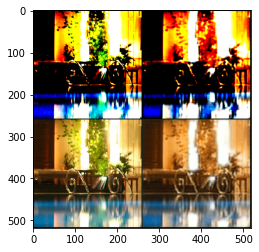

MS-SSIM loss: 0.157 | MSE: 34000.938 | perceptual loss: 2583474.000 | bpp: 0.251 |  PSNR: 20.538


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


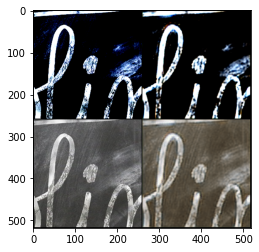

MS-SSIM loss: 0.138 | MSE: 15194.982 | perceptual loss: 1740431.000 | bpp: 0.159 |  PSNR: 24.032


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


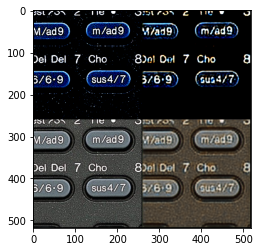

MS-SSIM loss: 0.170 | MSE: 53291.711 | perceptual loss: 2755677.000 | bpp: 3.596 |  PSNR: 18.586


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


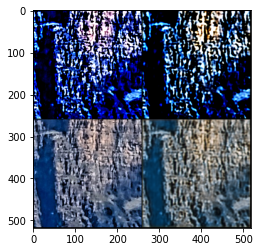

MS-SSIM loss: 0.076 | MSE: 27426.441 | perceptual loss: 2207111.500 | bpp: 1.459 |  PSNR: 21.480


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


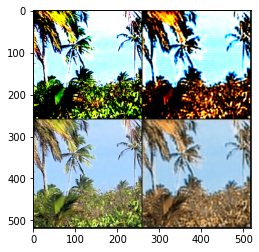

MS-SSIM loss: 0.137 | MSE: 37802.324 | perceptual loss: 2572452.000 | bpp: 2.098 |  PSNR: 20.081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


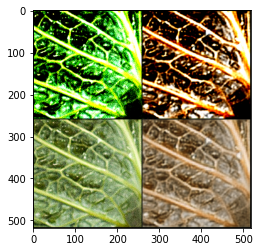

MS-SSIM loss: 0.136 | MSE: 38096.859 | perceptual loss: 2545387.500 | bpp: 0.676 |  PSNR: 20.052


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


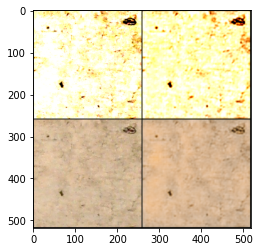

MS-SSIM loss: 0.121 | MSE: 4268.292 | perceptual loss: 1352109.375 | bpp: 2.064 |  PSNR: 29.534


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


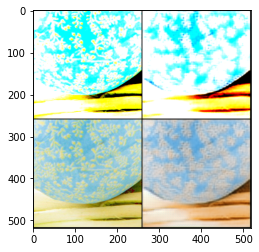

MS-SSIM loss: 0.293 | MSE: 21922.580 | perceptual loss: 2223516.500 | bpp: 0.232 |  PSNR: 22.449


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


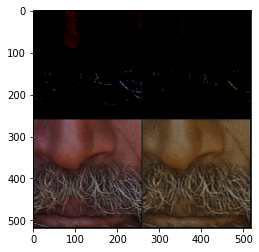

MS-SSIM loss: 0.093 | MSE: 11582.997 | perceptual loss: 1716603.500 | bpp: 3.142 |  PSNR: 25.236


In [4]:
msssim_total, mse_total, perceptual_total, bpp_total, PSNR_total = finetune(jpeg_ai, encoder, importance, decoder, probabilityModel, 
                                                           device, L1_loss, MSE_loss,
                                                           vgg16, round_straightthrough, dec_bias, d1, d2, d3)

In [6]:
print('='*80)
print('msssim: {:.3f} | mse: {:.3f} | perceptual: {:.3f} | bpp: {:.3f} | PSNR: {:.3f}'.format(
      msssim_total.tolist()/50, mse_total.tolist()/50, perceptual_total.tolist()/50, bpp_total.tolist()/50, PSNR_total/50))

msssim: 0.161 | mse: 23985.810 | perceptual: 1765432.320 | bpp: 1.460 | PSNR: 24.103
